# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

<h1>План урока<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#mini-batch-сильно-занижает-ошибку.-проверить-код!" data-toc-modified-id="mini-batch-сильно-занижает-ошибку.-проверить-код!-1">mini-batch сильно занижает ошибку. проверить код!</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-2">Масштабирование признаков</a></span><ul class="toc-item"><li><span><a href="#Нормализация-[0,-1]" data-toc-modified-id="Нормализация-[0,-1]-2.1">Нормализация [0, 1]</a></span></li><li><span><a href="#Стандартизация" data-toc-modified-id="Стандартизация-2.2">Стандартизация</a></span></li></ul></li><li><span><a href="#Стохастический-градиентный-спуск-и-mini-batch-градиентный-спуск" data-toc-modified-id="Стохастический-градиентный-спуск-и-mini-batch-градиентный-спуск-3">Стохастический градиентный спуск и mini-batch градиентный спуск</a></span></li><li><span><a href="#Регуляризация" data-toc-modified-id="Регуляризация-4">Регуляризация</a></span><ul class="toc-item"><li><span><a href="#L1-регуляризация---Lasso" data-toc-modified-id="L1-регуляризация---Lasso-4.1">L1 регуляризация - Lasso</a></span></li><li><span><a href="#L2-регуляризация---Ridge" data-toc-modified-id="L2-регуляризация---Ridge-4.2">L2 регуляризация - Ridge</a></span></li></ul></li><li><span><a href="#Домашние-задания" data-toc-modified-id="Домашние-задания-5">Домашние задания</a></span></li></ul></div>

## mini-batch сильно занижает ошибку. проверить код!

In [134]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

## Масштабирование признаков

In [135]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]]).T  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [136]:
# веса по МНК
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([3.98828270e+01, 2.18657683e+00, 2.94591674e-03, 5.27047320e+00])

In [137]:
X_1 = [1, 1, 1000, 1]
X_2 = [1, 1, 1000, 2]
X_1 @ w, X_2 @ w

(50.28579374158604, 55.55626694644765)

### Нормализация [0, 1]

In [138]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [139]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [140]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

$$x_{ij} = \frac{x_{ij} - min_{j} (x_{ij})}{max_{j} (x_{ij})-min_{j} (x_{ij})}$$

In [141]:
X_norm[:, 1] = (X[:, 1] - X[:, 1].min()) / (X[:, 1].max() - X[:, 1].min())
X_norm[:, 1]

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

In [142]:
X_norm[:, 2] = (X[:, 2] - X[:, 2].min()) / (X[:, 2].max() - X[:, 2].min())
X_norm[:, 2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

In [143]:
### Стандартизация

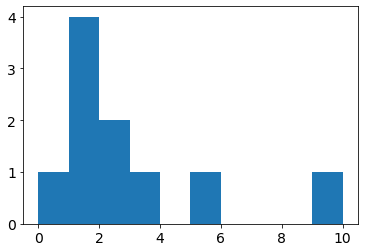

In [144]:
plt.hist(X[:, 1]);

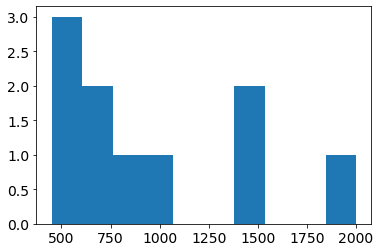

In [145]:
plt.hist(X[:, 2]);

$$s_{ij}=\frac{x_{ij} - \mu_{j}}{\sigma_{j}}$$

In [146]:
X_st = X.copy().astype(np.float64)

X_st[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_st[:, 1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [147]:
X_st[:, 1].mean(), X_st[:, 1].std()

(3.3306690738754695e-17, 1.0)

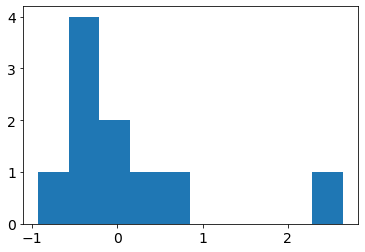

In [148]:
plt.hist(X_st[:, 1]);

In [149]:
def calc_std_feat(x):
    s = (x - x.mean()) / x.std()
    return s

In [150]:
X_st[:, 2] = calc_std_feat(X[:, 2])
X_st[:, 3] = calc_std_feat(X[:, 3])
print(X_st[:, 2])
print(X_st[:, 3])

[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]
[-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
  1.66447944  1.66447944 -0.89625816  0.38411064]


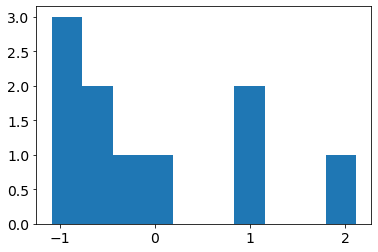

In [151]:
plt.hist(X_st[:, 2]);

In [152]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# Метод градиентного спуска
def eval_GD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [153]:
np.linalg.inv(X_st.T @ X_st) @ X_st.T @ y

array([57.4       ,  6.12241513,  1.42846588,  4.11637116])

In [154]:
w_sq_st = np.linalg.inv(X_st.T @ X_st) @ X_st.T @ y
y_pred = np.dot(X_st, w_sq_st)
err_sq = calc_mse(y, y_pred)
print(f'MSE для МНК для данных после стандартизации \t- {err_sq}\n')

w_sq = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = np.dot(X, w_sq)
err = calc_mse(y, y_pred)
print(f'MSE для МНК для данных БЕЗ стандартизации \t- {err}\n')

w_gd_st = eval_GD(X_st, y, iterations=1500, alpha=1e-2)
y_pred = np.dot(X_st, w_gd_st)
err_st = calc_mse(y, y_pred)
print(f'MSE для метода градиентного спуска для данных после стандартизации - {err_st}\n')

# Градиентный спуск на данных без стандартизации не сходится! 
w_gd = eval_GD(X, y, iterations=1500, alpha=1e-2)
y_pred = np.dot(X, w_gd)
err_gd = calc_mse(y, y_pred)
print(f'MSE для метода градиентного спуска для данных БЕЗ стандартизации - {err_gd}\n')

MSE для МНК для данных после стандартизации 	- 39.77774603555831

MSE для МНК для данных БЕЗ стандартизации 	- 39.77774603555828

150 [54.6517977   3.93619295  3.32277184  4.38532407] 48.50975036735786
300 [57.26727276  4.55529967  2.89027948  4.20488959] 40.2568881963691
450 [57.3935898   4.99245761  2.55431791  4.1072208 ] 40.02700920102978
600 [57.39969041  5.30327372  2.29437853  4.05919065] 39.91468961744933
750 [57.39998505  5.52555085  2.09368278  4.03988293] 39.85398827258408
900 [57.39999928  5.6854157   1.93900185  4.03650044] 39.820644308603235
1050 [57.39999997  5.80102512  1.81996261  4.04134839] 39.80208512858156
1200 [57.4         5.8850695   1.72846716  4.0499101 ] 39.79164482320059
1350 [57.4         5.94647036  1.65821673  4.05962582] 39.78572228821726
1500 [57.4         5.99153676  1.60432664  4.06912267] 39.78234065772863
MSE для метода градиентного спуска для данных после стандартизации - 39.78232384079615

150 [nan nan nan nan] nan
300 [nan nan nan nan] nan
450 [n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


## Стохастический градиентный спуск и mini-batch градиентный спуск

На каждом шаге итерации градиентный спуск вычисляет градиенты для всего обучающего набора, стохастический градиентный спуск вычисляет градиент для одного объекта, а mini-batch градиентный спуск будет случайно отбирать небольшой набор данных (batch) и по ним вычислять градиент.

In [155]:
# SGD - стохастический градиентный спуск
def eval_SGD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= alpha * (2 * np.dot((y_pred - y[ind]), X[ind]))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w, err

In [156]:
# mini-batch градиентный спуск
def eval_mbGD(X, y, iterations, batch=1, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // batch
    print('Количество батчей - ', n_batch)
    if n % batch != 0:
        n_batch += 1
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        for b in range(n_batch):
            start_ = batch * b
            end_ = batch * (b + 1)
            X_b = X[start_ : end_, :]
            y_b = y[start_ : end_]
            y_pred = np.dot(X_b, w)
            w -= alpha * (2/len(y_b) * np.dot((y_pred - y_b), X_b))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w, err

In [157]:
%%time

eval_GD(X_st, y, iterations=1000, alpha=1e-3)

100 [10.82085913  1.29195795  1.98348488  2.85162983] 2248.0687649833903
200 [19.27186149  2.14047528  2.7330693   3.60356199] 1510.2342373891095
300 [26.18957149  2.65450377  3.14650922  4.02491826] 1022.3117228222378
400 [31.85217926  2.97593535  3.36731266  4.25691776] 697.4953996732185
500 [36.48740201  3.18621662  3.47783381  4.380594  ] 480.53723685247013
600 [40.28164149  3.33210452  3.52533114  4.4424407 ] 335.3786903208636
700 [43.38747997  3.44044741  3.53692186  4.46912965] 238.17499151935831
800 [45.92981625  3.52666784  3.52816434  4.4759573 ] 173.05307208407038
900 [48.01088834  3.59963079  3.50798339  4.47169216] 129.4114395039912
1000 [49.71438487  3.66443755  3.48149699  4.4613567 ] 100.15781666892352
CPU times: user 60.2 ms, sys: 8.19 ms, total: 68.4 ms
Wall time: 64.5 ms


array([49.71438487,  3.66443755,  3.48149699,  4.4613567 ])

In [158]:
%%time

eval_SGD(X_st, y, iterations=1000, alpha=1e-3) 

100 [11.09673045  2.76640986  3.09785138  4.05453675] 2198.8260418322543
200 [19.40970234  2.86400447  3.09542826  4.41261566] 1489.2685911460044
300 [26.17509739  3.11438104  2.58040039  4.09774734] 1023.6032132506491
400 [31.81702081  3.52542922  3.12340955  4.91301949] 698.280881085139
500 [36.60993144  3.44836722  3.08448844  5.056057  ] 475.87491472215333
600 [40.30217517  3.07591389  2.79879237  4.97630842] 334.73121001431434
700 [43.25459714  3.16236038  3.0582185   5.02397079] 241.4393006420597
800 [45.76168692  3.39544823  3.18838517  5.19073598] 177.1779186488138
900 [47.76897074  3.42737814  3.03692328  4.92938277] 134.3585635124187
1000 [49.48646635  3.6879653   3.15768445  4.99102713] 104.1539682471064
CPU times: user 73.9 ms, sys: 6.49 ms, total: 80.4 ms
Wall time: 72.3 ms


(array([49.48646635,  3.6879653 ,  3.15768445,  4.99102713]),
 104.1539682471064)

In [159]:
%%time

eval_mbGD(X_st, y, iterations=1000, batch=10, alpha=1e-3) 

Количество батчей -  1
100 [10.82085913  1.29195795  1.98348488  2.85162983] 2248.0687649833903
200 [19.27186149  2.14047528  2.7330693   3.60356199] 1510.2342373891095
300 [26.18957149  2.65450377  3.14650922  4.02491826] 1022.3117228222378
400 [31.85217926  2.97593535  3.36731266  4.25691776] 697.4953996732185
500 [36.48740201  3.18621662  3.47783381  4.380594  ] 480.53723685247013
600 [40.28164149  3.33210452  3.52533114  4.4424407 ] 335.3786903208636
700 [43.38747997  3.44044741  3.53692186  4.46912965] 238.17499151935831
800 [45.92981625  3.52666784  3.52816434  4.4759573 ] 173.05307208407038
900 [48.01088834  3.59963079  3.50798339  4.47169216] 129.4114395039912
1000 [49.71438487  3.66443755  3.48149699  4.4613567 ] 100.15781666892352
CPU times: user 88.2 ms, sys: 11.3 ms, total: 99.4 ms
Wall time: 105 ms


(array([49.71438487,  3.66443755,  3.48149699,  4.4613567 ]),
 100.15781666892352)

## Регуляризация

In [160]:
### L1 регуляризация - Lasso

$$\sum^{n}_{i=1}L_i(\vec{x}_i,{y_i},\vec{w}) + \lambda \sum^{m}_{j=1}|w_{j}| \rightarrow \underset{w}{\text{min}}$$

In [161]:
### L2 регуляризация - Ridge

$$\sum^{n}_{i=1}L_i(\vec{x}_i,y_i,\vec{w}) + \lambda \sum^{m}_{j=1}w_{j}^{2} \rightarrow \underset{w}{\text{min}}$$

In [162]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * w)
        if verbose and i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [163]:
eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=0, verbose=True)

100 [10.82085913  1.29195795  1.98348488  2.85162983] 2248.0687649833903
200 [19.27186149  2.14047528  2.7330693   3.60356199] 1510.2342373891095
300 [26.18957149  2.65450377  3.14650922  4.02491826] 1022.3117228222378
400 [31.85217926  2.97593535  3.36731266  4.25691776] 697.4953996732185
500 [36.48740201  3.18621662  3.47783381  4.380594  ] 480.53723685247013
600 [40.28164149  3.33210452  3.52533114  4.4424407 ] 335.3786903208636
700 [43.38747997  3.44044741  3.53692186  4.46912965] 238.17499151935831
800 [45.92981625  3.52666784  3.52816434  4.4759573 ] 173.05307208407038
900 [48.01088834  3.59963079  3.50798339  4.47169216] 129.4114395039912
1000 [49.71438487  3.66443755  3.48149699  4.4613567 ] 100.15781666892352


array([49.71438487,  3.66443755,  3.48149699,  4.4613567 ])

Веса без регуляризации: [49.71438487,  3.66443755,  3.48149699,  4.4613567 ]

Визуализируем изменение весов при изменении коэффициента регуляризации.

In [164]:
w_list = []
l_list = []
error_list = []

for l in np.logspace(start=-4, stop=1, num=20):
    l_list.append(l)
    w_new = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=l)
    w_list.append(w_new)
    error_list.append(calc_mse(y, np.dot(X_st, w_new)))
weights = np.array(w_list)
errors = np.array(error_list)

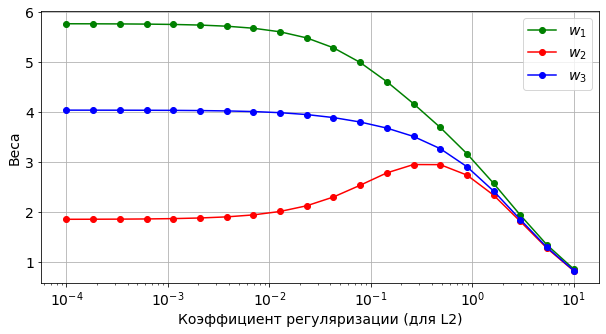

In [165]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
#plt.plot(l_list, weights[:, 0], 'mo-', label=r'$w_0$')
plt.plot(l_list, weights[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list, weights[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list, weights[:, 3], 'bo-', label=r'$w_3$')
plt.xlabel('Коэффициент регуляризации (для L2)')
plt.ylabel('Веса')
plt.grid()
plt.legend();

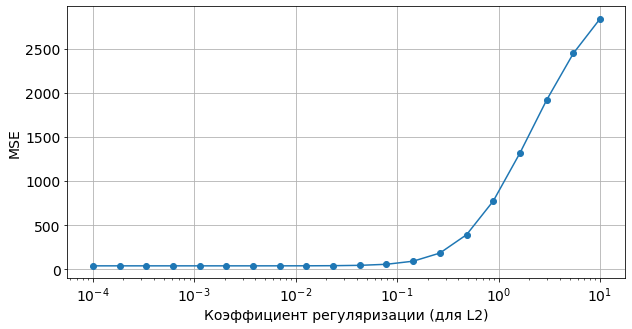

In [166]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(l_list, errors, 'o-')
plt.xlabel('Коэффициент регуляризации (для L2)')
plt.ylabel('MSE')
plt.grid();

## Домашние задания

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и  стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.
2. [\*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов (лучше графически).  


In [167]:
from sklearn import datasets

X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=6, 
                                      n_informative=5, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

eval_GD(X_, y_, 1000, alpha=1e-2)
eval_SGD(X_, y_, 1000, alpha=1e-2)
eval_mbGD(X_, y_, 1000, batch=20, alpha=1e-2)

100 [13.41171949 28.64535912 27.50610523 78.25626562 18.89255517 -0.32900751] 234.6104641617519
200 [ 1.68733096e+01  3.29478204e+01  3.08512288e+01  8.85752190e+01
  2.09413887e+01 -6.98480183e-02] 30.314392060882813
300 [1.75400781e+01 3.35925690e+01 3.12658286e+01 9.00108469e+01
 2.11489843e+01 7.36951675e-04] 26.13417272240316
400 [1.76544993e+01 3.36891595e+01 3.13165981e+01 9.02160766e+01
 2.11677329e+01 1.47247448e-02] 26.044500241974394
500 [1.76730956e+01 3.37035980e+01 3.13226790e+01 9.02460348e+01
 2.11689684e+01 1.71441831e-02] 26.042522448291898
600 [1.76760325e+01 3.37057487e+01 3.13233801e+01 9.02504774e+01
 2.11689478e+01 1.75297002e-02] 26.042478066197106
700 [1.76764892e+01 3.37060676e+01 3.13234556e+01 9.02511441e+01
 2.11689171e+01 1.75874926e-02] 26.04247705829992
800 [1.76765595e+01 3.37061146e+01 3.13234626e+01 9.02512450e+01
 2.11689087e+01 1.75956995e-02] 26.042477035197336
900 [1.76765703e+01 3.37061215e+01 3.13234631e+01 9.02512604e+01
 2.11689069e+01 1.75968

(array([1.76856830e+01, 3.36972516e+01, 3.13073426e+01, 9.02899257e+01,
        2.11922489e+01, 8.42332400e-02]), 26.04907471762098)

In [168]:
eval_model_reg2(X_, y_, 1000, alpha=1e-2, verbose=True)

100 [13.41171938 28.64535892 27.50610504 78.25626508 18.89255505 -0.32900751] 234.61048188019467
200 [ 1.68733094e+01  3.29478201e+01  3.08512285e+01  8.85752182e+01
  2.09413885e+01 -6.98480253e-02] 30.31439591890374
300 [1.75400779e+01 3.35925686e+01 3.12658283e+01 9.00108460e+01
 2.11489841e+01 7.36941339e-04] 26.134173324360024
400 [1.76544990e+01 3.36891591e+01 3.13165978e+01 9.02160757e+01
 2.11677327e+01 1.47247335e-02] 26.044500330854206
500 [1.76730953e+01 3.37035977e+01 3.13226787e+01 9.02460339e+01
 2.11689682e+01 1.71441716e-02] 26.042522461364623
600 [1.76760323e+01 3.37057484e+01 3.13233798e+01 9.02504765e+01
 2.11689476e+01 1.75296886e-02] 26.042478068130272
700 [1.76764889e+01 3.37060673e+01 3.13234553e+01 9.02511431e+01
 2.11689169e+01 1.75874811e-02] 26.04247705858818
800 [1.76765593e+01 3.37061143e+01 3.13234623e+01 9.02512441e+01
 2.11689085e+01 1.75956880e-02] 26.04247703524133
900 [1.76765701e+01 3.37061212e+01 3.13234628e+01 9.02512595e+01
 2.11689067e+01 1.75967

array([1.76765717e+01, 3.37061222e+01, 3.13234628e+01, 9.02512618e+01,
       2.11689064e+01, 1.75969259e-02])

In [169]:
def my_eval_SGD(X, y, iterations, alpha=1e-4):
    errors_SDG = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        errors_SDG.append(err)
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= alpha * (2 * np.dot((y_pred - y[ind]), X[ind]))
    return errors_SDG

In [170]:
def my_eval_mbGD(X, y, iterations, batch=1, alpha=1e-4):
    errors_mbGD = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // batch
    print('Количество батчей - ', n_batch)
    if n % batch != 0:
        n_batch += 1
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        errors_mbGD.append(err)
        for b in range(n_batch):
            start_ = batch * b
            end_ = batch * (b + 1)
            X_b = X[start_ : end_, :]
            y_b = y[start_ : end_]
            y_pred = np.dot(X_b, w)
            w -= alpha * (2/len(y_b) * np.dot((y_pred - y_b), X_b))
    return errors_mbGD

In [171]:
def my_eval_GD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    errors_GD = []
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        errors_GD.append(err)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
    return errors_GD

Количество батчей -  10


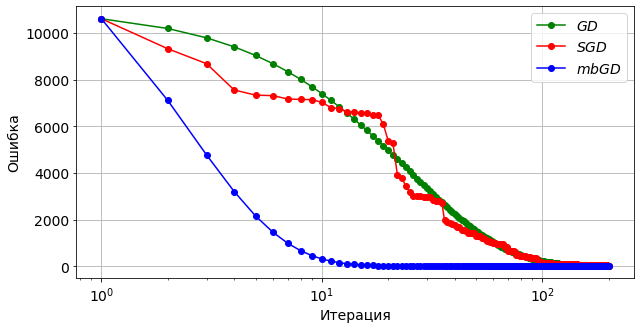

In [172]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
iterations = [i for i in range (1,201)]
plt.plot(iterations, my_eval_GD(X_, y_, 200, alpha=1e-2), 'go-', label=r'$GD$')
plt.plot(iterations, my_eval_SGD(X_, y_, 200, alpha=1e-2), 'ro-', label=r'$SGD$')
plt.plot(iterations, my_eval_mbGD(X_, y_, 200, batch=100, alpha=1e-2), 'bo-', label=r'$mbGD$')
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.grid()
plt.legend();

In [191]:
w_list = []
l_list = []
error_list = []

for l in np.logspace(start=-4, stop=1, num=20):
    l_list.append(l)
    w_new = eval_model_reg2(X_, y_, iterations=1000, alpha=1e-2, lambda_=l)
    w_list.append(w_new)
    error_list.append(calc_mse(y_, np.dot(X_, w_new)))
weights = np.array(w_list)
errors = np.array(error_list)

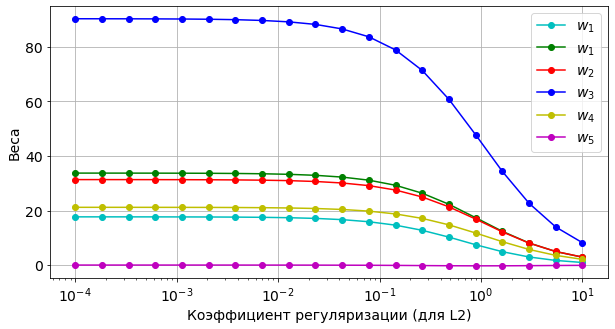

In [194]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(l_list, weights[:, 0], 'co-', label=r'$w_1$')
plt.plot(l_list, weights[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list, weights[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list, weights[:, 3], 'bo-', label=r'$w_3$')
plt.plot(l_list, weights[:, 4], 'yo-', label=r'$w_4$')
plt.plot(l_list, weights[:, 5], 'mo-', label=r'$w_5$')
plt.xlabel('Коэффициент регуляризации (для L2)')
plt.ylabel('Веса')
plt.grid()
plt.legend();

In [195]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * (w/abs(w)))
        if verbose and i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [196]:
eval_model_reg1(X_,y_, 1000, alpha=1e-2, verbose=True)

100 [13.41171949 28.64535911 27.50610523 78.25626562 18.89255517 -0.3290075 ] 234.61046439732618
200 [ 1.68733096e+01  3.29478204e+01  3.08512288e+01  8.85752190e+01
  2.09413887e+01 -6.98480137e-02] 30.314392099306083
300 [1.75400781e+01 3.35925690e+01 3.12658286e+01 9.00108469e+01
 2.11489843e+01 7.36955983e-04] 26.134172728011087
400 [1.76544993e+01 3.36891595e+01 3.13165981e+01 9.02160766e+01
 2.11677329e+01 1.47247407e-02] 26.044500242832854
500 [1.76730955e+01 3.37035980e+01 3.13226790e+01 9.02460348e+01
 2.11689684e+01 1.71441778e-02] 26.04252244841817
600 [1.76760325e+01 3.37057487e+01 3.13233801e+01 9.02504774e+01
 2.11689478e+01 1.75296947e-02] 26.042478066215548
700 [1.76764891e+01 3.37060676e+01 3.13234556e+01 9.02511441e+01
 2.11689171e+01 1.75874872e-02] 26.042477058302605
800 [1.76765595e+01 3.37061146e+01 3.13234626e+01 9.02512450e+01
 2.11689087e+01 1.75956940e-02] 26.042477035197727
900 [1.76765703e+01 3.37061215e+01 3.13234631e+01 9.02512604e+01
 2.11689069e+01 1.759

array([1.76765720e+01, 3.37061225e+01, 3.13234631e+01, 9.02512627e+01,
       2.11689066e+01, 1.75969320e-02])

In [204]:
w_list1 = []
l_list1 = []
error_list1 = []

for l in np.logspace(start=-4, stop=1, num=20):
    l_list1.append(l)
    w_new1 = eval_model_reg1(X_, y_, iterations=1000, alpha=1e-2, lambda_=l)
    w_list1.append(w_new1)
    error_list1.append(calc_mse(y_, np.dot(X_, w_new1)))
weights1 = np.array(w_list)
errors1 = np.array(error_list)

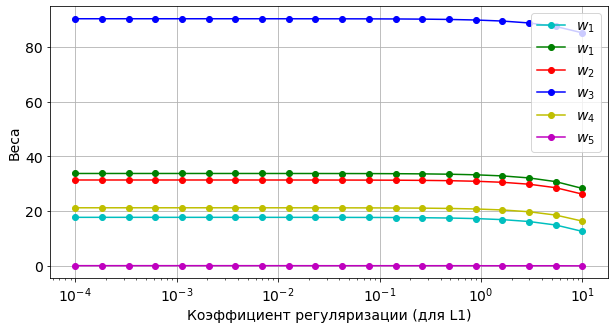

In [205]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(l_list1, weights1[:, 0], 'co-', label=r'$w_1$')
plt.plot(l_list1, weights1[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list1, weights1[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list1, weights1[:, 3], 'bo-', label=r'$w_3$')
plt.plot(l_list1, weights1[:, 4], 'yo-', label=r'$w_4$')
plt.plot(l_list1, weights1[:, 5], 'mo-', label=r'$w_5$')
plt.xlabel('Коэффициент регуляризации (для L1)')
plt.ylabel('Веса')
plt.grid()
plt.legend();

In [173]:
X_st_new = X_.copy().astype(np.float64)
index = 1
while index < 6:
  X_st_new[:, index] = calc_std_feat(X_[:, index])
  index+=1

eval_GD(X_st_new, y_, 1000, alpha=1e-2)
eval_SGD(X_st_new, y_, 1000, alpha=1e-2)
eval_mbGD(X_st_new, y_, 1000, batch=50, alpha=1e-2)

100 [13.49401104 28.30365055 27.47578259 78.08347274 18.88994654 -0.25875013] 240.27766578274688
200 [ 1.69820338e+01  3.19488534e+01  3.06973722e+01  8.83073456e+01
  2.09789902e+01 -3.86623352e-02] 45.22307100471537
300 [1.76516769e+01 3.24137524e+01 3.10745886e+01 8.97252180e+01
 2.11972947e+01 1.89645153e-02] 41.39006971223308
400 [1.77662062e+01 3.24723888e+01 3.11167628e+01 8.99279932e+01
 2.12181299e+01 2.99674680e-02] 41.310316322052095
500 [1.77847745e+01 3.24796453e+01 3.11210834e+01 8.99576984e+01
 2.12197166e+01 3.17844403e-02] 41.30858964726562
600 [1.77877038e+01 3.24805165e+01 3.11214467e+01 8.99621307e+01
 2.12197494e+01 3.20564201e-02] 41.308551124372244
700 [1.77881595e+01 3.24806160e+01 3.11214601e+01 8.99628013e+01
 2.12197260e+01 3.20936953e-02] 41.308550243424406
800 [1.77882298e+01 3.24806264e+01 3.11214561e+01 8.99629038e+01
 2.12197185e+01 3.20982972e-02] 41.308550222843714
900 [1.77882407e+01 3.24806273e+01 3.11214546e+01 8.99629196e+01
 2.12197168e+01 3.20987

(array([1.77908323e+01, 3.24690933e+01, 3.11148759e+01, 8.99652086e+01,
        2.12338190e+01, 6.09168157e-02]), 41.30971570897729)

Количество батчей -  10


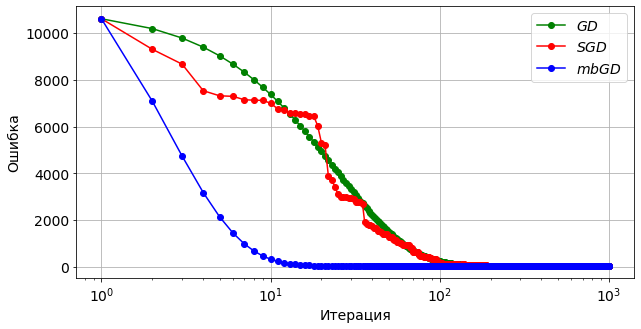

In [175]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
iterations = [i for i in range (1,1001)]
plt.plot(iterations, my_eval_GD(X_st_new, y_,  1000, alpha=1e-2), 'go-', label=r'$GD$')
plt.plot(iterations, my_eval_SGD(X_st_new, y_, 1000, alpha=1e-2), 'ro-', label=r'$SGD$')
plt.plot(iterations, my_eval_mbGD(X_st_new, y_, 1000, batch=100, alpha=1e-2), 'bo-', label=r'$mbGD$')
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.grid()
plt.legend();

In [176]:
X_norm_new = X_.copy()
X_norm_new = X_norm_new.astype(np.float64)
index = 1
while index < 6:
  X_norm_new[:, index] = (X_[:, index] - X_[:, index].min()) / (X_[:, index].max() - X_[:, index].min())
  index+=1
eval_GD(X_norm_new, y_, 1000, alpha=1e-2)
eval_SGD(X_norm_new, y_, 1000, alpha=1e-2)
eval_mbGD(X_norm_new, y_, 1000, batch=50, alpha=1e-2)

100 [ 8.38972347  2.17213677  1.75910305 19.88952327 -1.78346309 -8.45448982] 10359.407416888607
200 [  9.52069279   2.09557887   0.41474975  35.05246705  -5.65214415
 -18.44710255] 10010.75327464183
300 [  9.82576554   1.77833484  -1.13955125  49.27365359  -9.61132072
 -28.24610725] 9693.929827700442
400 [ 10.02386415   1.45792114  -2.65618107  62.83049846 -13.42022435
 -37.64932508] 9404.525824583638
500 [ 10.20190623   1.15945233  -4.10991038  75.77906699 -17.05910822
 -46.65012091] 9140.146195230876
600 [ 10.37064162   0.88427953  -5.50038928  88.14951558 -20.53272329
 -55.26312836] 8898.625791176311
700 [ 10.53166539   0.63115557  -6.82998158  99.96800869 -23.84827473
 -63.5047285 ] 8677.987183092964
800 [ 10.68546364   0.39862428  -8.10126048 111.25923969 -27.01294217
 -71.3908701 ] 8476.42409345864
900 [ 10.83237689   0.18528759  -9.31672716 122.04676308 -30.03361108
 -78.93684836] 8292.286570062006
1000 [ 1.09727156e+01 -1.01687272e-02 -1.04787824e+01  1.32353076e+02
 -3.291685

(array([  14.4557375 ,   -0.75057505,  -35.19673514,  353.26960632,
         -93.43571668, -246.0589447 ]), 6345.80066767685)

Количество батчей -  50


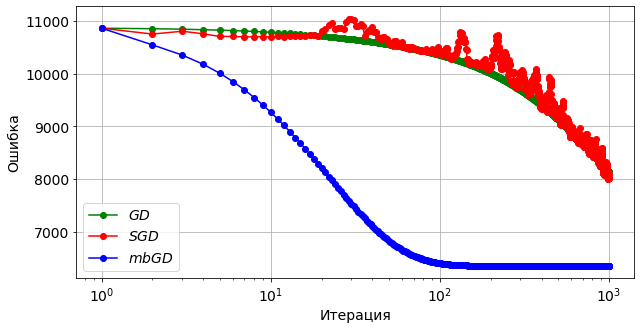

In [178]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
iterations = [i for i in range (1,1001)]
plt.plot(iterations, my_eval_GD(X_norm_new, y_, 1000, alpha=1e-2), 'go-', label=r'$GD$')
plt.plot(iterations, my_eval_SGD(X_norm_new, y_, 1000, alpha=1e-2), 'ro-', label=r'$SGD$')
plt.plot(iterations, my_eval_mbGD(X_norm_new, y_, 1000, batch=20, alpha=1e-2), 'bo-', label=r'$mbGD$')
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.grid()
plt.legend();

In [179]:
w_ = np.linalg.inv(X_.T @ X_) @ X_.T @ y_
y_pred_ = np.dot(X_, w_)
err_ = calc_mse(y_, y_pred_)
print(err_)

26.04247703465077


In [180]:
w_st_new = np.linalg.inv(X_st_new.T @ X_st_new) @ X_st_new.T @ y_
y_pred_new = np.dot(X_st_new, w_st_new)
err_st_new = calc_mse(y_, y_pred_new)
print(err_st_new)

41.308550222341616


In [181]:
w_norm_new = np.linalg.inv(X_norm_new.T @ X_norm_new) @ X_norm_new.T @ y_
y_pred_newnorm = np.dot(X_norm_new, w_norm_new)
err_st_newnorm = calc_mse(y_, y_pred_newnorm)
print(err_st_newnorm)

6345.53887637608


Методичка https://colab.research.google.com/drive/1nEC_D2y-maMuvbN-5iYFAjzLUw0eGOir